**복습문제**
- requests를 이용해 영화 목록과 예매율, 주요정보를 수집하세요.
- 영화목록과 주요정보는 딕셔너리로 구성되어야 합니다.
- http://www.cgv.co.kr/movies/

In [24]:
import requests
from bs4 import BeautifulSoup 



url = 'http://www.cgv.co.kr/movies/'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

for movie_title in soup.find_all('strong', class_="title"):
    print(movie_title.text.strip())
    
for reservation_percent in soup.find_all('strong', class_="percent"):
    percent = reservation_percent.find('span').text
    print(percent)
    
    
for box_contents in soup.find_all('div', class_="box-contents"):
    title_id_list = box_contents.find('a').attrs['href']
    res_detail = requests.get(f'http://www.cgv.co.kr{title_id_list}')
    soup = BeautifulSoup(res_detail.text, 'html.parser')
    div = soup.find_all('div', class_="sect-story-movie")
    for main_story in div:
        print(main_story.text)



블랙 팬서-와칸다 포에버
동감
데시벨
폴-600미터
심야카페-미씽 허니
에브리씽 에브리웨어 올 앳 원스
한산 리덕스
첫번째 아이
극장판 소드 아트 온라인 -프로그레시브- 짙은 어둠의 스케르초
바르도, 약간의 진실을 섞은 거짓된 연대기
파이어버드
극장판 짱구는 못말려-수수께끼! 꽃피는 천하떡잎학교
자백
같은 속옷을 입는 두 여자
[씨네뮤지엄] 누구나 알지만 아무도 잘 모른다, 피카소
인생은 아름다워
트랜스
알카라스의 여름
가재가 노래하는 곳
28.2%
18.3%
16.0%
4.5%
1.6%
1.3%
1.2%
0.6%
0.6%
0.5%
0.4%
0.3%
0.2%
0.2%
0.1%
0.1%
0.1%
0.0%
0.0%

“와칸다를 지켜라!”
거대한 두 세계의 충돌, 운명을 건 최후의 전투가 시작된다!

국왕이자 ‘블랙 팬서’인 '티찰라'의 죽음 이후
수많은 강대국으로부터 위협을 받게 된 '와칸다'.
'라몬다', '슈리' 그리고 '나키아', '오코예, '음바쿠'는
각자 사명감을 갖고 '와칸다'를 지키기 위해 외로운 싸움을 이어간다.

한편, 비브라늄의 패권을 둘러싼 미스터리한 음모와 함께
깊은 해저에서 모습을 드러낸 최강의 적 '네이머'와 '탈로칸'의 전사들은
'와칸다'를 향해 무차별 공격을 퍼붓기 시작하는데…
 
            

                1999년, '용'은 첫눈에 반하게 된 '한솔'을 사로잡기 위해
친구에게 HAM 무전기를 빌린다.

2022년, ‘무늬’는 인터뷰 과제를 위해
오래된 HAM 무전기를 작동시킨다.

"씨큐... 씨큐... 제 목소리 들리세요?" 

개기 월식이 일어난 날,
시간을 뛰어넘어 기적처럼 연결된 ‘용’과 ‘무늬’는
서로의 사랑과 우정을 이야기하며 특별한 감정을 쌓아가는데...

1999 - 2022
마음을 수신합니다.


소음이 커지는 순간 폭.발.한.다

물이 끓는 주전자 소리, 창문 여는 소리, 놀이터 아이들의 웃음 소리…
잠시 후, 거대한 굉음과 함께 단독 주택이 폭발했다는 뉴스 속보가 전해진다.
그리고, 뉴

## **1. 데이터프레임**

- DataFrame은 판다스의 기본 자료구조입니다.
- DataFrame은 여러 series 컬럼으로 구성됩니다.
- 각 Series에는 데이터 타입이 있습니다.
- Excel spreadsheet이라고 생각하면 이해하기 쉽습니다.
- row는 각 개별 데이터를, column은 개별 속성을 의미

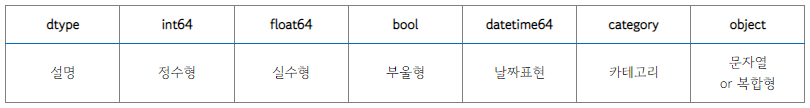

**1-1) 빈 데이터프레임을 만들어봅시다**

In [25]:
import pandas as pd

df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


**1-2) 리스트를 이용하여 데이터프레임을 만들어봅시다.**

In [29]:
import pandas as pd
names = ['윈터', '카리나', '수빈', '승희']
english_score = [100, 95, 60, 88]
dic = {'이름':names, '영어성적':english_score}
df = pd.DataFrame(dic)
df


,이름,영어성적
0,윈터,100
1,카리나,95
2,수빈,60
3,승희,88


In [31]:
df['이름']

0     윈터
1    카리나
2     수빈
3     승희
Name: 이름, dtype: object

**1-3) 리스트에 값을 추가해봅시다.**

In [11]:
add_data = {'이름':'크롱', '영어성적':22} # 데이터 추가 
df2 = df.append(add_data, ignore_index=True) # append로 넣기. 새로운 곳에 다시 넣어줘야 한다. ignore_index도 해주기.
df2

,이름,영어성적
0,윈터,100
1,카리나,95
2,수빈,60
3,승희,88
4,크롱,22


**1-4) csv파일을 열어봅시다.**

In [16]:
# wget을 이용하면 쉽게 다운로드 받을 수 있어요.
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2022-11-16 16:03:02--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2022-11-16 16:03:02 (5.00 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [33]:
# pd.read_csv

df = pd.read_csv('./titanic.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

**1-5) head, tail을 통해 데이터를 살펴봅시다.**

In [34]:
# head
# n=3
df.head()

df.head(n = 10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
# tail
# n=5
df.tail() # 뒤에 다섯개를 보여준다. 

**1-6) 데이터 파악하기 (shape, describe, info)**

In [36]:
# shape

TypeError: 'tuple' object is not callable

In [37]:
# describe

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**1-7) 데이터 자르기**

In [38]:
df[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


**1-8) 형변환(astype)**

In [42]:
df['Survived'] = df['Survived'].astype('bool') # boolean 타입으로 바꿨다.
print(df)

     PassengerId  Survived  Pclass  \
0              1     False       3   
1              2      True       1   
2              3      True       3   
3              4      True       1   
4              5     False       3   
..           ...       ...     ...   
886          887     False       2   
887          888      True       1   
888          889     False       3   
889          890      True       1   
890          891     False       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

**1-9) 컬럼 추출(columns, [])**

In [43]:
df[['Pclass','Survived', 'PassengerId']] # 여러개를 선택하고 싶으면 리스트안에 넣어준다. 

,Pclass,Survived,PassengerId
0,3,False,1
1,1,True,2
2,3,True,3
3,1,True,4
4,3,False,5
...,...,...,...
886,2,False,887
887,1,True,888
888,3,False,889
889,1,True,890


**1-10) 행 추출(data.loc[[986, 100, 110, 990]])**
- loc
- iloc

In [45]:
df.loc[[1,5,10], ['Survived', 'Pclass']]

,Survived,Pclass
1,True,1
5,False,3
10,True,3


**1-11) 새로운 열 만들기**

In [46]:
df['tax'] = df['Fare'] / 10 # tax라는 컬럼이 생긴다.  

## **2. 데이터프레임 실습**
1) csv파일을 다운받습니다.

2) head, tail을 통해 데이터를 살펴봅시다.

3) shape, describe, info로 데이터를 파악합시다.

3) 상위 10개와 하위 10개 데이터를 합쳐 20개 데이터를 만들어봅시다.

- 위/아래로 합치기 - 행 기준
- pd.concat([df1, df2], axis = 0)
- 옆으로 합치기 - 열 기준
- pd.concat([df1, df2], axis = 1)

https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

In [52]:
iris_df = pd.read_csv('./iris.csv')

# head, tail 데이터 살펴보기
# iris_df.head()
# iris_df.tail()

# shape, describe, info 
# iris_df.describe()
# iris_df.info()
# print(iris_df.shape)

df1 = iris_df.head(10)
df2 = iris_df.tail(10)

df_mix = pd.concat([df1,df2], axis=0)
print(df_mix)



(150, 5)
     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
5             5.4          3.9           1.7          0.4     Setosa
6             4.6          3.4           1.4          0.3     Setosa
7             5.0          3.4           1.5          0.2     Setosa
8             4.4          2.9           1.4          0.2     Setosa
9             4.9          3.1           1.5          0.1     Setosa
140           6.7          3.1           5.6          2.4  Virginica
141           6.9          3.1           5.1          2.3  Virginica
142           5.8          2.7           5.1          1.9  Virginica
143           6.8        

## **3. Boolean Selection**

In [54]:
# 30대면서 1등석에 탄 사람 선택하기
df = pd.read_csv('./titanic.csv')
class_ = df['Pclass'] == 1 # Pclass가 1인 친구들만 True로 만들어줌
age_ = (df['Age'] >= 30) & (df['Age'] < 40)

df[class_ & age_] # 나이 조건과 1등석 조건을 만족하는 모두를 출력하기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S


**3-1) 실습: 성별이 남성이고, 사망한 사람들(survived==0)을 추출**

In [55]:
df = pd.read_csv('./titanic.csv')

male_ = df['Sex'] == 'male'
dead_ = df['Survived'] == 0

df[male_ & dead_]





,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


**3-2) 실습: 아이리스 데이터세트에서 Virginica이고 sepal.length가 5 이상인 데이터 추출**

In [57]:
iris_df = pd.read_csv('./iris.csv')

virginica_ = iris_df['variety'] == 'Virginica'
sepal_length_above_5 = iris_df['sepal.length'] >= 5

iris_df[virginica_ & sepal_length_above_5]

,sepal.length,sepal.width,petal.length,petal.width,variety
100,6.3,3.3,6.0,2.5,Virginica
101,5.8,2.7,5.1,1.9,Virginica
102,7.1,3.0,5.9,2.1,Virginica
103,6.3,2.9,5.6,1.8,Virginica
104,6.5,3.0,5.8,2.2,Virginica
105,7.6,3.0,6.6,2.1,Virginica
107,7.3,2.9,6.3,1.8,Virginica
108,6.7,2.5,5.8,1.8,Virginica
109,7.2,3.6,6.1,2.5,Virginica
110,6.5,3.2,5.1,2.0,Virginica


## **4. 일일과제**

알라딘 새로나온상품 크롤러 만들기

https://www.aladin.co.kr/shop/common/wnew.aspx?BranchType=1

- request 모듈을 이용하여 1에서 3페이지의 책을 수집합니다.
- URL, 책 이름, 책 정가, 책 소개를 수집하여 데이터프레임으로 만듭니다.
- 50%할인가 컬럼을 책 정가 칼럼을 이용하여 만듭니다.
- 50%할인가가 10000원 이상인 책들만 추출합니다.

In [85]:
import requests
from bs4 import BeautifulSoup 

dic = dict()

price_list = list()
title_list = list()
url_list = list()

for page in range(1,4):
    page_url = f'https://www.aladin.co.kr/shop/common/wnew.aspx?ViewRowsCount=25&ViewType=Detail&SortOrder=6&page={page}&BranchType=1&PublishDay=84&CustReviewRankStart=&CustReviewRankEnd=&CustReviewCountStart=&CustReviewCountEnd=&PriceFilterMin=&PriceFilterMax=&SearchOption='
    res = requests.get(page_url)
    soup = BeautifulSoup(res.text, 'html.parser')
    for a_tag in soup.find_all('a', class_='bo3'):
        url = a_tag.attrs['href']
        url_list.append(url)
        title = a_tag.find('b').text.strip()
        title_list.append(title)
        detail_url = requests.get(f'{url}')
        soup = BeautifulSoup(detail_url.text, 'html.parser')
        for price_tag in soup.find('div', class_='Ritem'):
            price = price_tag.text.strip()
            price = price[0:-1].replace(',', "")
            price_list.append(price)
            dic = {'책제목': title_list , '가격': price_list, 'URL': url_list }
            
df = pd.DataFrame(dic)

discount_ = df['discount'] 

        
    
    


                          책제목     가격  \
0   작은 아씨들 : 정서경 대본집 세트 - 전2권  48000   
1             소설엔 마진이 얼마나 남을까  15000   
2                  오늘 여기에, 우리  22000   
3             세상에서 가장 아름다운 경기  16000   
4           장례식 케이크 전문점 연옥당 2  21000   
..                        ...    ...   
69               수학보다 데이터 문해력  17000   
70              아기 다람쥐의 크리스마스  14000   
71                   잃어버린 옆모습  15000   
72                오늘도 어질러진 채로  14000   
73                  바이어가 몰려온다  16000   

                                                  URL  
0   https://www.aladin.co.kr/shop/wproduct.aspx?It...  
1   https://www.aladin.co.kr/shop/wproduct.aspx?It...  
2   https://www.aladin.co.kr/shop/wproduct.aspx?It...  
3   https://www.aladin.co.kr/shop/wproduct.aspx?It...  
4   https://www.aladin.co.kr/shop/wproduct.aspx?It...  
..                                                ...  
69  https://www.aladin.co.kr/shop/wproduct.aspx?It...  
70  https://www.aladin.co.kr/shop/wproduct.aspx?It...  
71  https://www